In [18]:
import pandas as pd
import yfinance as yf
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mpl_dates

In [19]:
plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)
# Obtaining historical stock pricing data
ticker_symbol = 'AAPL'
ticker = yf.Ticker(ticker_symbol)

start_date = '2020-01-01'
end_date = '2023-07-01'

df = ticker.history(interval='1d', start=start_date, end=end_date)

df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)

df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
Date,,,,,,,,
2020-01-02,72.246670,73.309986,71.990600,73.249016,135480400,0.0,0.0,18263.0
2020-01-03,72.468610,73.305113,72.310090,72.536896,146322800,0.0,0.0,18264.0
2020-01-06,71.649184,73.153913,71.395548,73.114891,118387200,0.0,0.0,18267.0
2020-01-07,73.124647,73.383158,72.549096,72.771027,108872000,0.0,0.0,18268.0
2020-01-08,72.471046,74.246484,72.471046,73.941635,132079200,0.0,0.0,18269.0
...,...,...,...,...,...,...,...,...
2023-06-26,186.578051,187.796407,184.980202,185.020157,48088700,0.0,0.0,19534.0
2023-06-27,185.639310,188.135938,185.419605,187.806381,50730800,0.0,0.0,19535.0
2023-06-28,187.676554,189.643899,187.347013,188.994781,51216800,0.0,0.0,19536.0


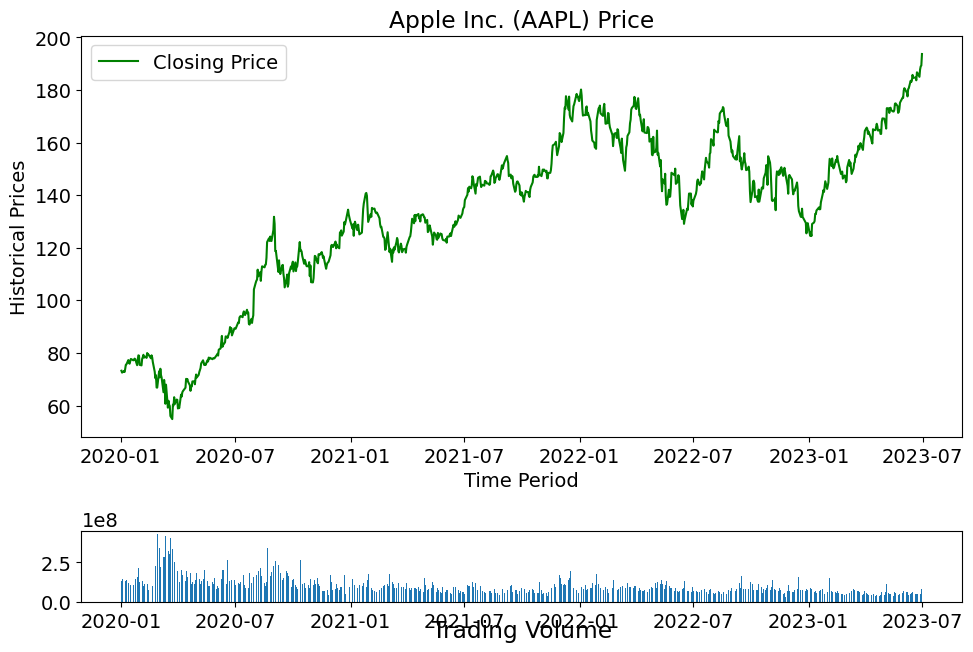

In [20]:
top_plt = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
top_plt.plot(df['Close'].loc['2020-01-01':].index, df['Close'].loc['2020-01-01':], color = 'g', label='Closing Price')
plt.xlabel('Time Period')
plt.ylabel('Historical Prices')
plt.title('Apple Inc. (AAPL) Price')
plt.legend()
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
bottom_plt.bar(df['Volume'].loc['2020-01-01':].index, df['Volume'].loc['2020-01-01':])
plt.title('\nTrading Volume', y=-0.60)
plt.gcf().set_size_inches(10,8)
plt.tight_layout()

In [34]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
count,880.000000,880.000000,880.000000,880.000000,8.800000e+02,880.000000,880.000000,880.000000
mean,133.068657,134.725735,131.536134,133.210532,1.051757e+08,0.003469,0.004545,18900.031818
std,31.082760,31.296271,30.887492,31.113751,5.509420e+07,0.027347,0.134840,368.427435
min,55.755904,55.858576,51.974144,54.848965,3.519590e+07,0.000000,0.000000,18263.000000
25%,118.204979,119.695351,116.842187,118.360489,7.045718e+07,0.000000,0.000000,18578.750000
50%,140.465762,142.221930,138.043387,140.520241,8.987460e+07,0.000000,0.000000,18899.500000
75%,154.291590,156.512512,152.641743,154.892838,1.214590e+08,0.000000,0.000000,19219.250000
max,191.371579,194.217727,191.002068,193.708420,4.265100e+08,0.240000,4.000000,19538.000000


In [21]:
train = df['Close'][:818].to_numpy()
test = df['Close'][813:].to_numpy()
len (

Text(0, 0.5, 'Historical Prices')

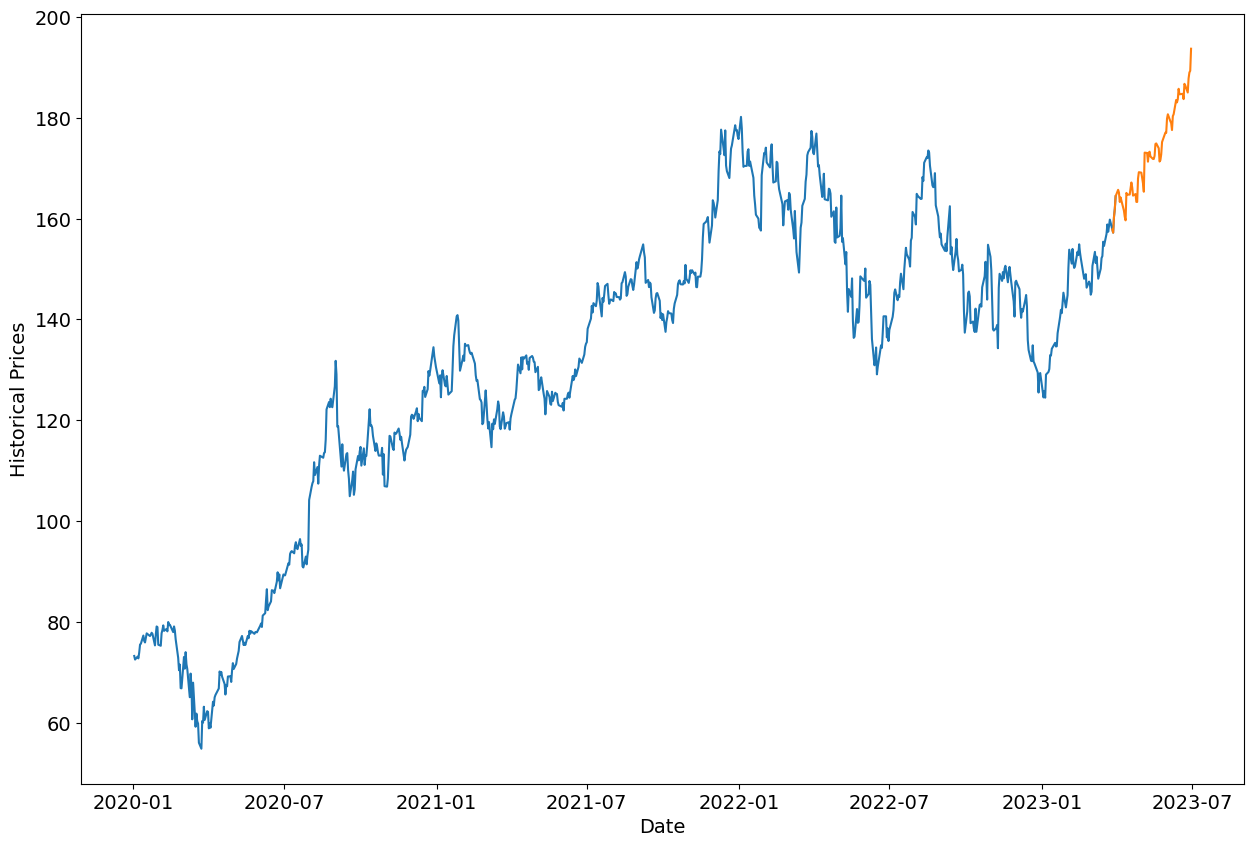

In [22]:
plt.figure(figsize=(15,10))
plt.plot(df['Close'][:818])
plt.plot(df['Close'][813:])
plt.xlabel('Date')
plt.ylabel('Historical Prices')

In [23]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU, SimpleRNN

In [24]:
sc = MinMaxScaler(feature_range=(0,1))
train = sc.fit_transform(train.reshape(-1,1))
train.shape

(818, 1)

In [25]:
def data_preparation(data):
    x = []
    y = []
    
    for i in range(5, len(data)):
        x.append(data[i-5:i, 0])
        y.append(data[i])
    x, y = np.array(x), np.array(y)
    
    x = np.reshape(x, (x.shape[0], x.shape[1], 1))
    return x, y

In [26]:
x_train, y_train = data_preparation(train)
x_train.shape

(813, 5, 1)

In [27]:
regressor = Sequential()
regressor.add(SimpleRNN(units = 5, activation = "tanh", return_sequences = True, input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 5))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["accuracy"])
regressor.fit(x_train, y_train, epochs = 50, batch_size = 4)

Epoch 1/50
204/204 [==============================] - 27s 7ms/step - loss: 0.5913 - accuracy: 0.0025
Epoch 2/50
204/204 [==============================] - 1s 7ms/step - loss: 0.2767 - accuracy: 0.0025
Epoch 3/50
204/204 [==============================] - 1s 6ms/step - loss: 0.1256 - accuracy: 0.0025
Epoch 4/50
204/204 [==============================] - 1s 7ms/step - loss: 0.0705 - accuracy: 0.0025
Epoch 5/50
204/204 [==============================] - 1s 7ms/step - loss: 0.0550 - accuracy: 0.0025
Epoch 6/50
204/204 [==============================] - 1s 7ms/step - loss: 0.0367 - accuracy: 0.0025
Epoch 7/50
204/204 [==============================] - 1s 7ms/step - loss: 0.0344 - accuracy: 0.0025
Epoch 8/50
204/204 [==============================] - 2s 8ms/step - loss: 0.0255 - accuracy: 0.0025
Epoch 9/50
204/204 [==============================] - 2s 9ms/step - loss: 0.0247 - accuracy: 0.0025
Epoch 10/50
204/204 [==============================] - 2s 8ms/step - loss: 0.0186 - accuracy: 0.002

In [28]:
y_pred = regressor.predict(x_train)  
y_pred = sc.inverse_transform(y_pred) 
y_pred.shape

26/26 [==============================] - 7s 4ms/step


(813, 1)

In [29]:
test = sc.transform(test.reshape(-1,1))
x_test, y_test = data_preparation(test)
x_test.shape

(62, 5, 1)

In [30]:
y_pred_of_test = regressor.predict(x_test)
y_pred_of_test = sc.inverse_transform(y_pred_of_test)
y_pred_of_test.shape

2/2 [==============================] - 0s 4ms/step


(62, 1)

C:\Users\Dini Susanti\AppData\Local\Temp\ipykernel_19492\24582643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = y_pred_of_test


<function matplotlib.pyplot.show(close=None, block=None)>

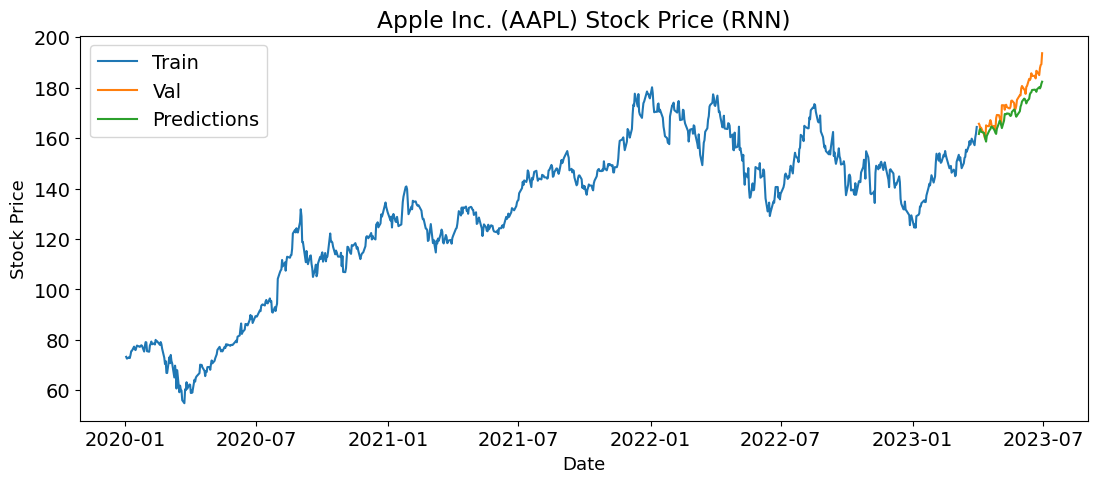

In [35]:
dtrain = df[:818]
valid = df[818:]
valid['Predictions'] = y_pred_of_test

plt.figure(figsize=(13,5))
plt.title('Apple Inc. (AAPL) Stock Price (RNN)')
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Stock Price', fontsize = 13)
plt.plot(dtrain['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'upper left')
plt.show

In [32]:
newtest = df['Close'][818:].to_numpy()
mse = np.square(np.subtract(newtest,y_pred_of_test)).mean()
mse

130.8626084003186

In [33]:
rsme = np.sqrt(mse)
rsme

11.43951958782879